# SKTime Basic Usage

In [1]:
%%markdown

# Basic usage


# Basic usage


# Forcasting

Use the following command to forcast the change

In [2]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split

In [3]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

/opt/homebrew/anaconda3/envs/timeseries/lib/python3.10/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/opt/homebrew/anaconda3/envs/timeseries/lib/python3.10/site-packages/sktime/forecasting/base/_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/opt/homebrew/anaconda3/envs/timeseries/lib/python3.10/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/opt/homebrew/anaconda3/envs/timeseries/lib/python3.10/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/opt/homebrew/anaconda3/envs/timeser

0.08174636623531822

# Time Series Classification

In [4]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8679245283018868

# Time Series Regression

In [6]:
from sktime.datasets import load_covid_3month
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor
from sklearn.metrics import mean_squared_error

In [7]:
X_train, y_train = load_covid_3month(split="train")
y_train = y_train.astype("float")
X_test, y_test = load_covid_3month(split="test")
y_test = y_test.astype("float")
regressor = KNeighborsTimeSeriesRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

0.002921957478363366

# Time Series Clustering

In [8]:
from sklearn.model_selection import train_test_split
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.clustering.utils.plotting._plot_partitions import plot_cluster_algorithm
from sktime.datasets import load_arrow_head

<Figure size 500x1000 with 0 Axes>

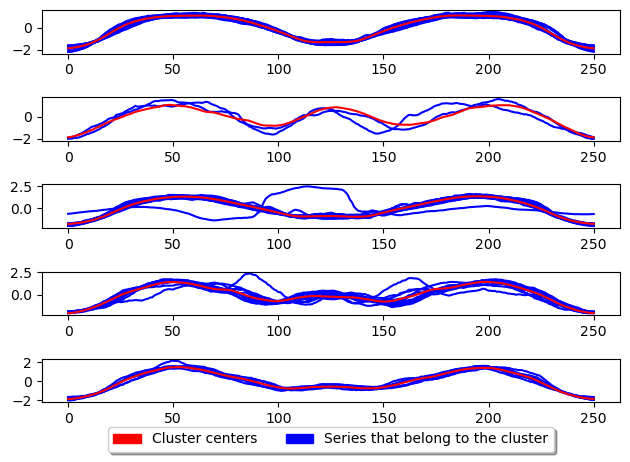

In [9]:
X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)

k_means = TimeSeriesKMeans(n_clusters=5, init_algorithm="forgy", metric="dtw")
k_means.fit(X_train)
plot_cluster_algorithm(k_means, X_test, k_means.n_clusters)

# Time Series Annotation

In [10]:
from sktime.annotation.adapters import PyODAnnotator
from pyod.models.iforest import IForest
from sktime.datasets import load_airline

In [12]:
y = load_airline()
pyod_model = IForest()
pyod_sktime_annotator = PyODAnnotator(pyod_model)
pyod_sktime_annotator.fit(y)
annotated_series = pyod_sktime_annotator.predict(y)

In [13]:
print(annotated_series)

1949-01    1
1949-02    0
1949-03    0
1949-04    0
1949-05    0
          ..
1960-08    1
1960-09    1
1960-10    0
1960-11    0
1960-12    1
Freq: M, Length: 144, dtype: int64
